# Projeto 2 - Predição de preços de casas

## House Prices - Advanced Regression Techniques
Peça a um comprador de imóveis para descrever a casa dos seus sonhos e eles provavelmente não começarão com a altura do teto do porão ou a proximidade de uma linha de trem. Mas este conjunto de dados prova que há muitos detalhes que influenciam as negociações de preços do que o número de quartos ou uma cerca branca.

### Sobre este projeto
Os principais pontos que serão avaliados:
- Levantamento de hipóteses
- Criação e seleção de características
- Manipulação de dados e criação de gráficos simples com o Pandas
- Criar um modelo de predição
- Apresentação dos resultados

### Preparação do ambiente
Para este projeto, acessem o link - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.

In [1]:
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option("display.max_columns", None)

## Exercício
Neste projeto você deverá desenvolver a partir do que já vimos nos projetos anteriores, ou seja, poderá usar qualquer um dos modelos vistos durante as aulas. Siga este roteiro e preencha cada parte.

### 1. Análise exploratória de dados (1.0 ponto)
Realize a análise exploratória de dados. Observe cada variável, como se comportam em relação a outras variáveis independentes e com a variável dependente.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.drop(['Id'], axis=1, inplace=True)

Vamos explorar os preços de vendas (``SalePrice``).

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

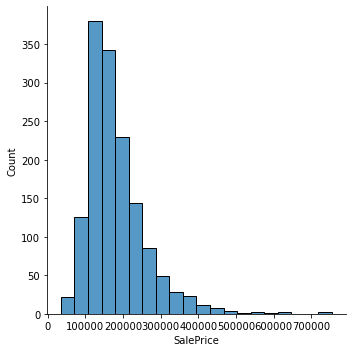

In [8]:
sns.displot(data=df['SalePrice'], bins=20);

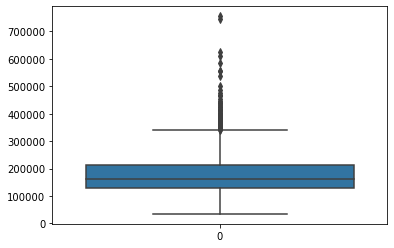

In [9]:
sns.boxplot(data=df['SalePrice']);

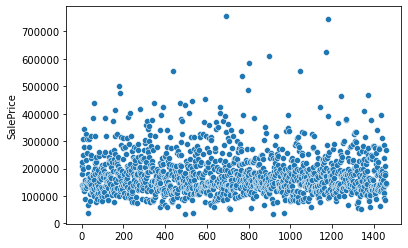

In [10]:
sns.scatterplot(data=df['SalePrice']);

vejamos quantos outliers temos em ``SalesPrice``

In [11]:
q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)
fiq = q3 - q1

In [12]:
inferior_limit = q1 - 1.5*fiq
superior_limit = q3 + 1.5*fiq

In [13]:
df.loc[ (df['SalePrice'] < inferior_limit) | (df['SalePrice'] > superior_limit) ]['SalePrice'].count()

61

In [14]:
df.drop(df.loc[ (df['SalePrice'] < inferior_limit) | (df['SalePrice'] > superior_limit) ].index, inplace=True)

In [28]:
df_corr = df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)
df_corr

SalePrice        1.000000
OverallQual      0.784294
GrLivArea        0.661325
GarageCars       0.628013
GarageArea       0.607230
FullBath         0.577369
YearBuilt        0.564558
TotalBsmtSF      0.543508
YearRemodAdd     0.541161
1stFlrSF         0.522785
GarageYrBlt      0.507894
TotRmsAbvGrd     0.472292
Fireplaces       0.453010
MasVnrArea       0.352794
OpenPorchSF      0.325791
LotFrontage      0.319597
2ndFlrSF         0.317358
WoodDeckSF       0.302339
BsmtFinSF1       0.290377
HalfBath         0.278831
LotArea          0.249812
BsmtUnfSF        0.222795
BsmtFullBath     0.202185
BedroomAbvGr     0.201610
ScreenPorch      0.108851
MoSold           0.070478
PoolArea         0.048682
3SsnPorch        0.043324
BsmtFinSF2       0.007154
MiscVal         -0.012872
BsmtHalfBath    -0.018827
YrSold          -0.028245
OverallCond     -0.048005
LowQualFinSF    -0.058086
MSSubClass      -0.060111
EnclosedPorch   -0.144996
KitchenAbvGr    -0.147385
Name: SalePrice, dtype: float64

In [29]:
df_corr = df_corr[(df_corr < 1) & (df_corr > .4)].reset_index()
feat_names = df_corr['index']
feat_names

0      OverallQual
1        GrLivArea
2       GarageCars
3       GarageArea
4         FullBath
5        YearBuilt
6      TotalBsmtSF
7     YearRemodAdd
8         1stFlrSF
9      GarageYrBlt
10    TotRmsAbvGrd
11      Fireplaces
Name: index, dtype: object

In [17]:
buffer_labels = np.append(feat_names, 'SalePrice')
df_buffer = df[buffer_labels]

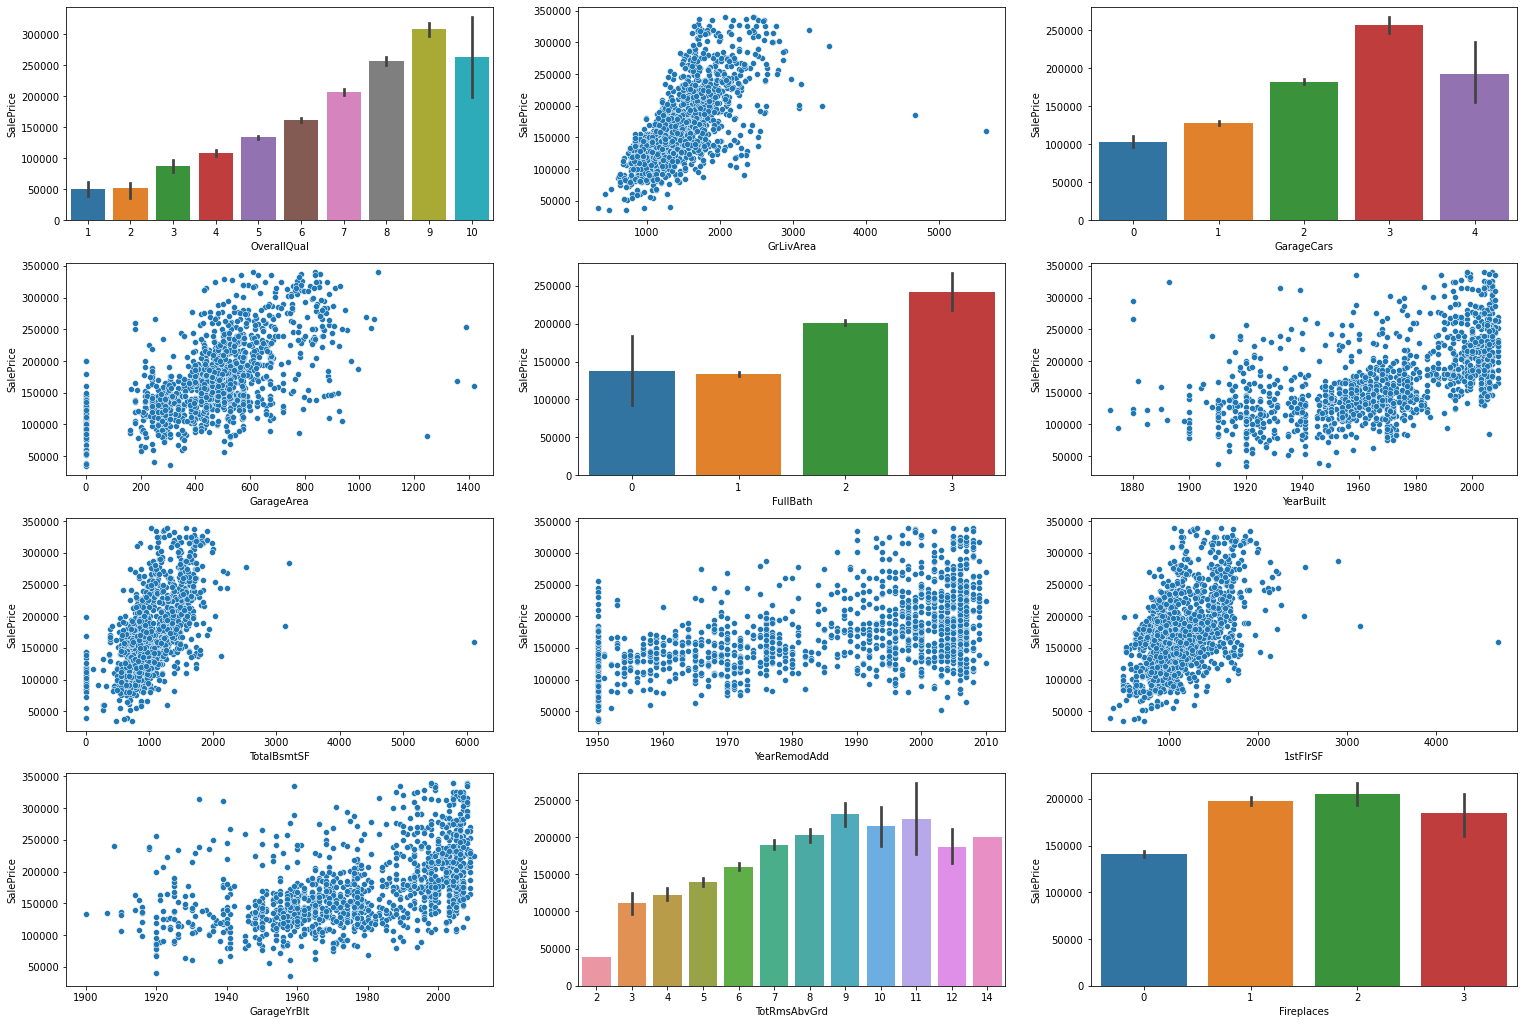

In [36]:
plt.figure(figsize=(26,18))
# plt.subplot(autoscale_on=True)

plt.subplot(4,3,1)
sns.barplot(data=df_buffer, x='OverallQual', y='SalePrice')

plt.subplot(4,3,2)
sns.scatterplot(data=df_buffer, x='GrLivArea', y='SalePrice')

plt.subplot(4,3,3)
sns.barplot(data=df_buffer, x='GarageCars', y='SalePrice')

plt.subplot(4,3,4)
sns.scatterplot(data=df_buffer, x='GarageArea', y='SalePrice')

plt.subplot(4,3,5)
sns.barplot(data=df_buffer, x='FullBath', y='SalePrice')

plt.subplot(4,3,6)
sns.scatterplot(data=df_buffer, x='YearBuilt', y='SalePrice')

plt.subplot(4,3,7)
sns.scatterplot(data=df_buffer, x='TotalBsmtSF', y='SalePrice')

plt.subplot(4,3,8)
sns.scatterplot(data=df_buffer, x='YearRemodAdd', y='SalePrice')

plt.subplot(4,3,9)
sns.scatterplot(data=df_buffer, x='1stFlrSF', y='SalePrice')

plt.subplot(4,3,10)
sns.scatterplot(data=df_buffer, x='GarageYrBlt', y='SalePrice')

plt.subplot(4,3,11)
sns.barplot(data=df_buffer, x='TotRmsAbvGrd', y='SalePrice')

plt.subplot(4,3,12)
sns.barplot(data=df_buffer, x='Fireplaces', y='SalePrice');



In [63]:
df_buffer = df[['GarageQual', 'GarageCond', 'SalePrice']]

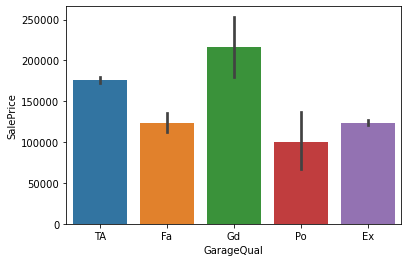

In [67]:
sns.barplot(data=df_buffer, y='SalePrice', x='GarageQual');

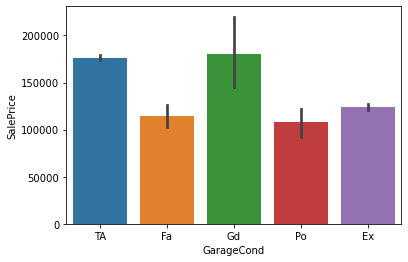

In [68]:
sns.barplot(data=df_buffer, y='SalePrice', x='GarageCond');

In [69]:
df_buffer = df[['PoolQC', 'SalePrice']]

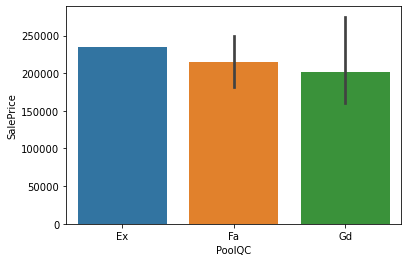

In [70]:
sns.barplot(data=df_buffer, y='SalePrice', x='PoolQC');

**R:** A variável dependente ``SalePrice`` tem uma correlação de média a forte

Limpeza de NaN's:

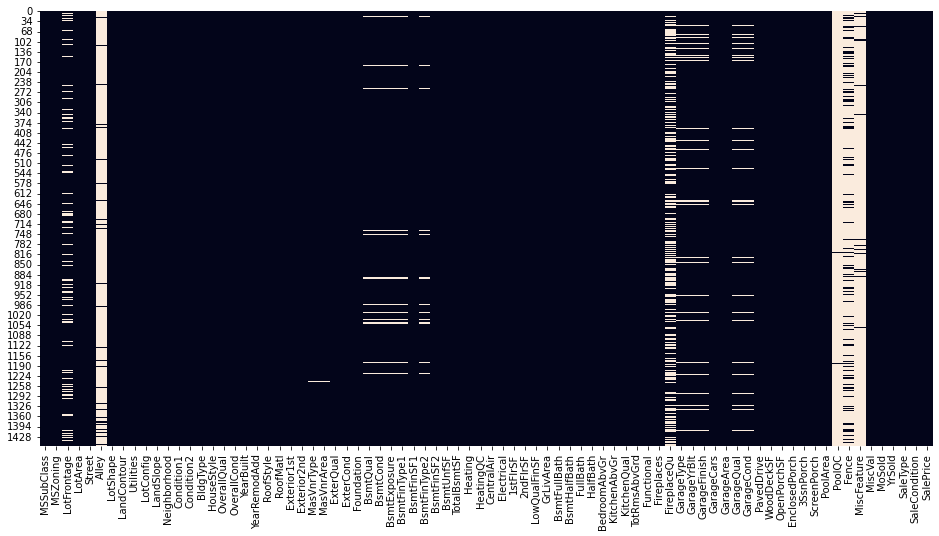

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);

In [ ]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

primeiro, eliminaremos algumas colunas  que tem visivelmente muitos NaN's

In [12]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Verificando casos de NaN's

In [13]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Temos 259 NaN's em ``LotFrontage``

In [14]:
df['LotFrontage'].isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

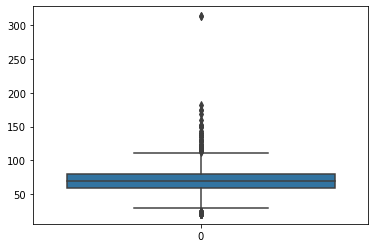

In [15]:
sns.boxplot(data=df['LotFrontage']);

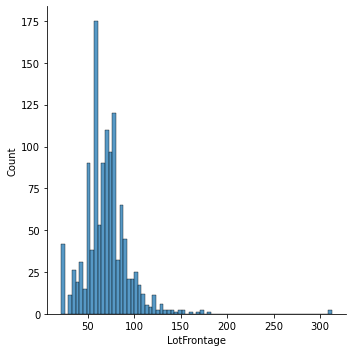

In [16]:
sns.displot(data=df['LotFrontage'])

Média e mediana estão bem próximas.

In [17]:
print('média: ', df.LotFrontage.mean())
print('mediana: ', df.LotFrontage.median())

média:  70.04995836802665
mediana:  69.0


Usaremos a mediana para preencher os valores faltantes.

In [18]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

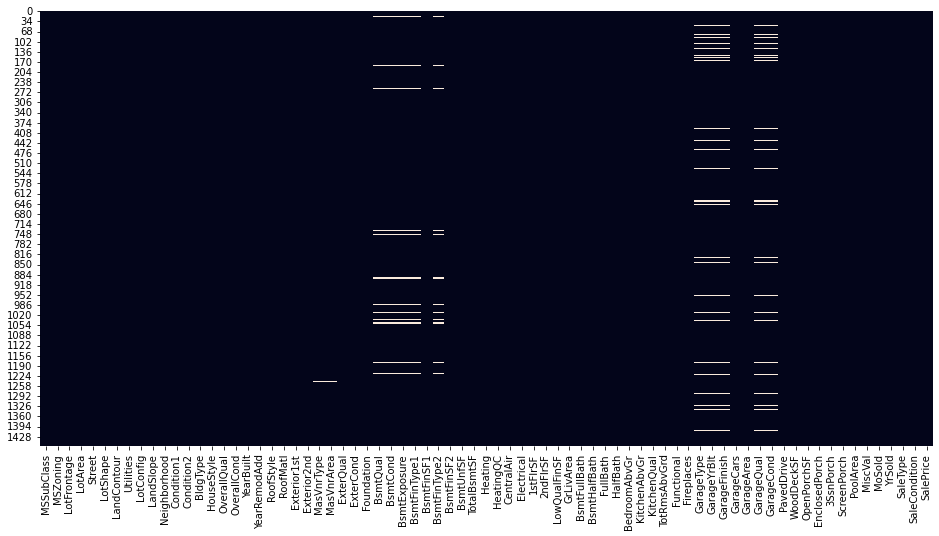

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);

Hora de verificar o atributo ``MasVnrType``:

In [20]:
df[['MasVnrType']].isna().value_counts()

MasVnrType
False         1452
True             8
dtype: int64

In [21]:
df[df['MasVnrType'].isna() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,69.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,20,RL,69.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [22]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [23]:
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [24]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Verificando o dicionário de dados, ``MasVnrType`` está relacionada a ``MasVnrArea``. Usaremos ``0`` para preencher os dados faltantes de ``MasVnrArea`` e então, para manter coerência, ``MasVnrType`` será preenchido com ``None``

In [25]:
df['MasVnrArea'].fillna(0, inplace=True)

In [26]:
df['MasVnrType'].fillna('None', inplace=True)

Verificando NaN's em variáveis relacionadas ao porão:

In [27]:
df['BsmtQual'].isna().value_counts()

False    1423
True       37
Name: BsmtQual, dtype: int64

In [28]:
df[df['BsmtQual'].isna()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,69.0,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,0,7,2008,WD,Normal,134432


É um caso parecido com o anterior. Consideraremos que os imóveis com NaN neste atributo não possuem porão e preencheremos todas as variáveis relacionadas com ``NA``, seguindo o dicionário de dados.

In [29]:
df_buffer = df[['BsmtQual', 'BsmtCond',	'BsmtExposure',	'BsmtFinType1', 'BsmtFinType2']].fillna('NA')
df[['BsmtQual', 'BsmtCond',	'BsmtExposure',	'BsmtFinType1', 'BsmtFinType2']] = df_buffer

Atributos relacionados à garagem:

In [30]:
df['GarageType'].isna().value_counts()

False    1379
True       81
Name: GarageType, dtype: int64

In [31]:
df[df['GarageType'].isna()==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NA,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,0,12,2008,WD,Normal,122000
1407,20,RL,69.0,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,3,2009,WD,Normal,112000
1449,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,0,9,2009,WD,Normal,136000


Mesmo caso anterior. Usaremos a mesma estratégia e considerar as casa com NaN neste atributo, como casa sem garagem.

In [32]:
df_buffer = df[['GarageType', 'GarageQual',	'GarageCond', 'GarageFinish']].fillna('NA')
df[['GarageType', 'GarageQual',	'GarageCond', 'GarageFinish']] = df_buffer

Droparemos o atributo ``GarageYrBlt`` pois seus valores são ano de construção da garagem, dado difícil de preencher com algum valor como média, mediana, etc pois os NaN's neste atributo representam imóveis sem garagem e atribuir algum valor poderia interferir na verossimilhança do modelo de ML posteriormente.

In [33]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

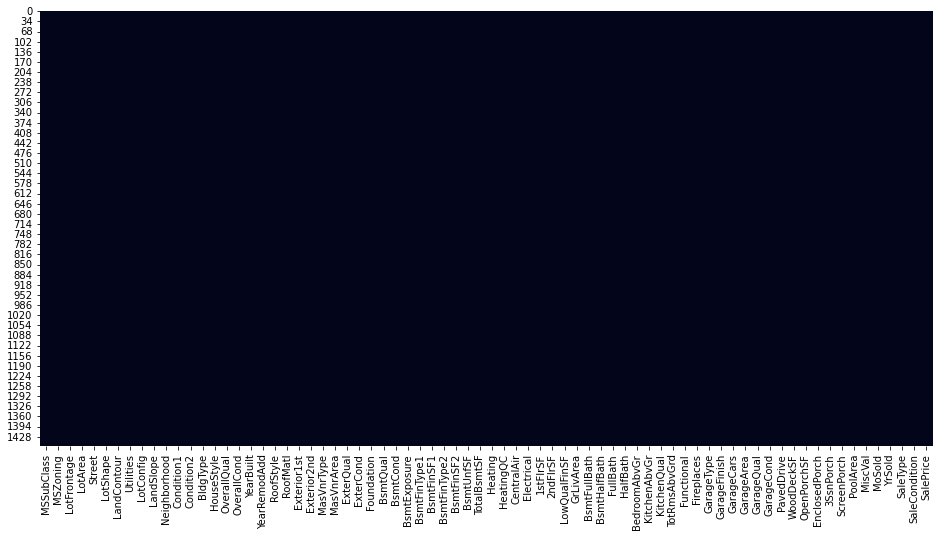

In [34]:
plt.figure(figsize=(16,8))
sns.heatmap(data = df.isna(), cbar=False);